In [ ]:
##MNIST로 분류하기.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

as_frame = True면 Pandas(DataFrame) 형태로.
<br>
False여서 그냥 numpy 형태.
<br>
그래서 출력결과 그냥 numpy 형태.

In [ ]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print('\n')
print(y.shape)

(70000, 784)


(70000,)


target은 레이블 값. data는 (행,열)로 구성된 배열.

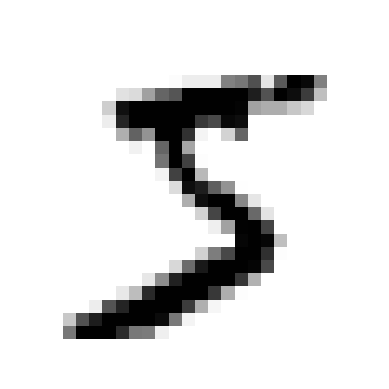

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) #784였던 배열을, 28*28로 재배열.

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
y[0]

'5'

실제 레이블로 확인 결과. 동일 '5'
<br>
근데, 레이블이 문자열로 되어있음.

In [ ]:
import numpy as np

y = y.astype(np.uint8)

In [ ]:
y[0]

5

그래서 y값 정수로 변환.
<br>
확인 결과 정수값 5

In [ ]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:]

트레인 세트(60000개), 테스트 세트(10000)개 분류 

<h3> 이진 분류 </h3>
<br>
예를 들어, '숫자 5가 맞고', '숫자 5가 아니고' 이렇게 두 개의 클래스로 분류할 수 있는게 <h3>이진 분류</h3>

In [ ]:
y_train_5 = (y_train == 5) # 5면 True, 5가 아니면 전부 False
y_test_5 = (y_test == 5) # 5면 True, 5가 아니면 전부 False

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

분류기: 확률적 경사 하강법(SGD) 사용.

In [ ]:
sgd_clf.predict([some_digit]) #위에 SGD로 이미지 5를 나타내는지 예측해보니 True로.

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

k-교차검증. k = 3으로.
<br>
정확도 전부 95% 넘음.
<br>
나중에는 쓸 때 이걸 평균내서 사용.

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

<h3> 더미 분류기.</h3>
<br> 
5가 아닌걸 따로 분류하는 분류기.
<br>
np.zeros로 반환 값 전부 0으로 만듦.

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

정확도는 아까보다 낮아졌다, '불균형이 심한' 데이터 다룰땐 주의할 것.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
print(y_train_pred)

[ True False False ...  True False False]


<h5> 오차 행렬 </h5>
<br>
동일하게 k-교차 검증 하긴 하는데, 어떤 점수를 내는게 아니라, 참 거짓 형태로.(True, False)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

[[not 5 맞음, 5라 잘못], [not 5 잘못, 5 맞음]]
<br>
[[진짜 음성(TN), 거짓 양성(FP)], [거짓 음성(FN), 진짜 양성(TP)]]

정확도(accuracy) = (TN + TP) / (TP + FN + TN + FP) 
<br>
정밀도(precision) = TP / (TP + FP) -> 양성 예측 정확도
<br>
재현율(recall) = TP / (TP + FN) -> 진짜 양성 비율(TPR), 정확한 감지 비율

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) #정밀도 
print('\n')
print(recall_score(y_train_5, y_train_pred)) #재현율

0.8370879772350012


0.6511713705958311


확인 결과, 5로 판별된 데이터 중에서 83%정도만 정확
<br>
5로 판별된 데이터 중 65%만 정확하게 감지.

'F1 점수'라는 것이 있는데, 정밀도와 재현율의 '조화평균'임.
<br>
F1 = TP / (TP + (FN + FP) / 2) ->이게 F1 식.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

ex)
<br> 어린아이를 위한 안전한 동영상 분류(낮은 재현율, 높은 정밀도)
<br> CCTV이용한 도둑잡기(높은 재현율, 낮은 정밀도)

<br>
<br>
정밀도와 재현율을 모두 높일 수는 없는데, 이를 '정밀도/재현율 트레이드오프'라고 한다. ->정밀도와 재현율은 서로 반비례 값.

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

print('\n')

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]


[ True]


In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

'decision_function()' 메서드 호출하면, 각 샘플에 대한 점수 확인 가능.
<br>
샘플 점수 확인, 예측값 2164.
<br>
확인 결과, 임계값 올릴 수록, 재현율 줄어듦.
<br>
하지만, 임계값 설정이 너무 극단적. 적절한 임계값 정의 필요.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                             method = 'decision_function')

cross_val_predict()함수 써서, 샘플 점수 얻기. 이번에는 예측 결과가 아닌, '결정점수' 받도록. 그래서 'decision_function'

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

'precision_recall_curve'로 모든 임계값에 대한 정밀도 & 재현율 구하기 가능.

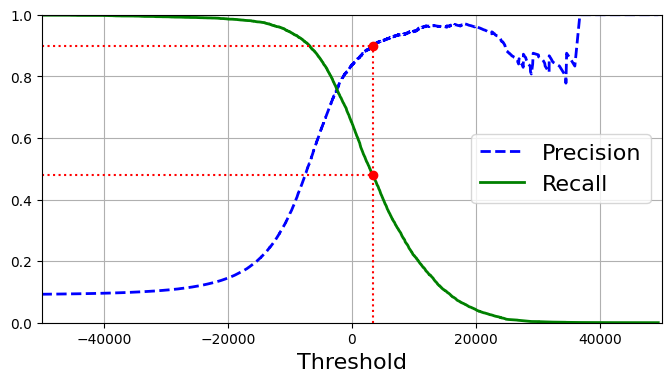

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)        
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])            


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")  
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([threshold_90_precision], [0.9], "ro")                               
plt.plot([threshold_90_precision], [recall_90_precision], "ro")              

#save_fig("precision_recall_vs_threshold_plot")                                
plt.show()

정밀도가 올라갈 수록 재현율 내려가고, 재현율 올라가면, 정밀도 올라가는 것, 그래프로 확인.
<br>
위에 정밀도 그래프 꾸불꾸불 한 이유는, 그림으로 확인 결과, 숫자 하나 이동만큼, 정밀도 올라갔다 내려갔다 반복.

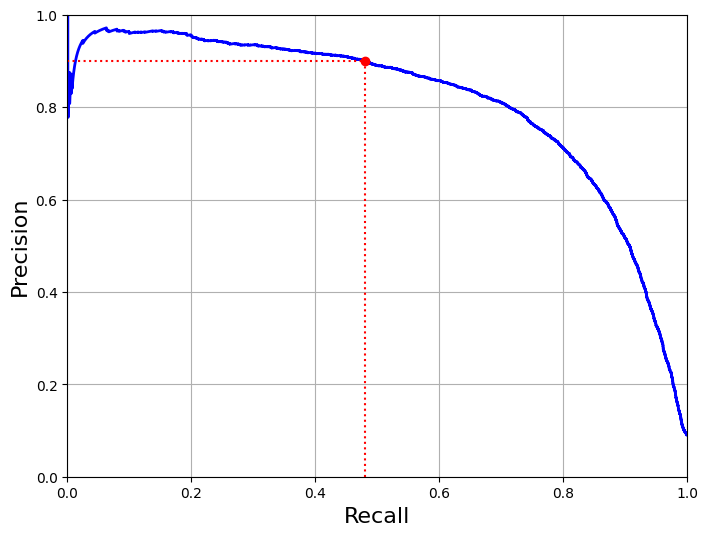

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)


plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:") 
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")      
plt.plot([recall_90_precision], [0.9], "ro") 
#save_fig("precision_vs_recall_plot")
plt.show()

정밀도/재현율 트레이드오프 그래프로 선택하는 또 다른 방법.
<br> 
정밀도 90% 달성이 목표라는 가정.
<br>


In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # np.argmax는 첫번째 True값.

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

아까처럼, 임의 지정이 아닌, 목표점수에서의 임계값으로 설정 가능.

In [ ]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


정밀도는 90 달성, 재현율은 47로 너무 낮아서 이 분류기는 좋지 않다.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

<h3> ROC곡선 </h3>
ROC곡선은 재현율에 대한 1-TNR(특이도)
<br>
FPR = FP / (FP + TN) = (FP + TN - TN) / (FP + TN) = 1 - TN / (FP + TN) = 1 - TNR
<br>
ROC 곡선을 그리려면, roc_curve() 함수 사용해서. TPR, FPR 계산.

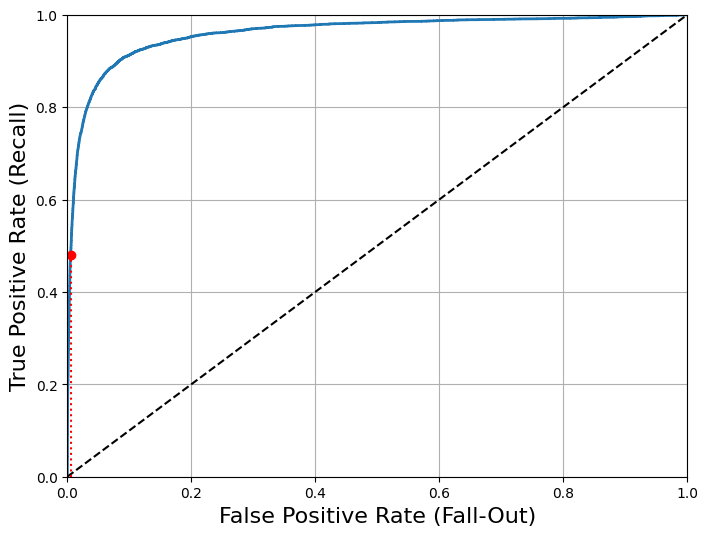

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)

fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]      

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")  
#save_fig("roc_curve_plot")
plt.show()

면적이 1이 될수록 더 좋은 분류기.
<br>
재현율(TPR)이 높을 수록, 거짓양성(FPR)이 늘어남.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

곡선아래 면적(AUC)를 측정하면, 좋은 분류기는 AUC가 1.
<br>
완전한 렌덤 분류기는 0.5

양성 클래스 드물고, 거짓 음성보다 거짓 양성이 더 중요 -> PR곡선 사용.
<br>
아니면 ROC곡선.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

RandomForestClassifier에서의 predict_proba() 메서드 -> 주어진 샘플이 속할 확률(ex. 어떤 이미지가 5일 확률 70%)

In [ ]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률(확률을 점수로 사용.)

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

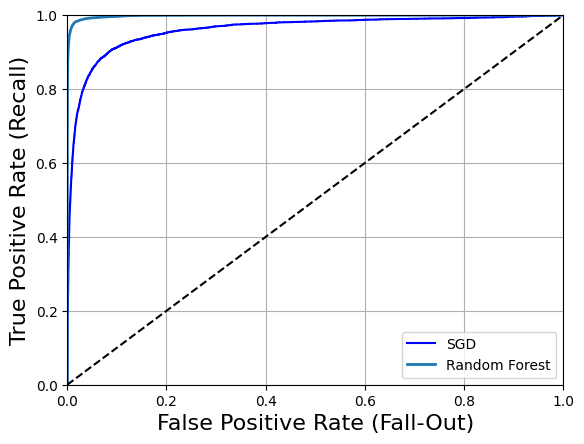

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = 'lower right')
plt.show()

ROC 곡선 결과, RandomForestClassifier가 더 좋다.

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

점수로 봐도 99%정도. 더 좋음

다중 분류기 -> 둘 이상의 클래스 구별.
<br>
<br>
결정 점수 중에서 가장 높은 것 선택 -> OvR전략 = OvA
<br>
각 숫자 조합마다 이진 분류 훈련 -> OvO전략(ex. 분류기 전부 통과시켜서 양성으로 가장 많이 분류된 것 선택)

훈련세트 작은 것 -> OvO 선호
<br>
대부분 이진 분류에서는 OvR 사용.

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

일부로 y_train_5로 해준 것이 아닌, 원래 타깃 데이터로 훈련. -> 'OvR'전략.

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

실제로 10개(0~9) 다 넣고 돌렸는지 확인.-> OvR로 한것인지 확인.

In [ ]:
print(np.argmax(some_digit_scores)) #argmax()로 최댓값 위치한 인덱스 반환.

print(svm_clf.classes_) #사용된 클래스 확인.
 
print(svm_clf.classes_[5]) #5번 인덱스에 해당하는 클래스.(우연히 5로 정확. 드문 경우.)

5
[0 1 2 3 4 5 6 7 8 9]
5


OvO, OvR 사용 강제 위해서는, OneVsRestClassifier사용. 

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])


10

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

훈련 후, decision_function()메서드 사용하여 클래스 별 하나의 값 반환.
<br>
점수 확인 결과,대부분의 점수 음수,3을 의심.(5 이외에 양수)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy') #교차검증 사용, 정확도 평가

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

첫 교차검증 시행 후, 정확도 높이려고 입력 스케일 조정.